# KNN Classification with Ablation Study

## Import libraries

In [1]:
import pandas as pd                      # for data manipulation
import seaborn as sns                    # For plots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   # for splitting data into train and test data
from sklearn.preprocessing import StandardScaler      # to scale data
from sklearn.metrics import classification_report    # to view accuracy,f1-score,recall

from sklearn.neighbors import KNeighborsClassifier  # For kNN classifier


In [2]:
df = pd.read_csv("breast_cancer_wisconsin .csv")

Looking into the dataset...

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Checking for null values...

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The "Unnamed: 32" doesn't look necessary and the "id" column will not be needed ,so let's drop these 2 columns

In [6]:
df = df.drop("Unnamed: 32",axis=1)
df = df.drop("id",axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
print(df['diagnosis'].unique())

['M' 'B']


## Visualize the Data

**Question : On what basis do we pick two features and decide to plot it?**

**Answer :**

**Look for features with high class separability**
- In this dataset, some features naturally differ between benign (B) and malignant (M) tumors.
- Example: radius_mean and area_mean — malignant tumors are usually larger, so these features show distinct clusters.
- Plotting features with clear differences helps see the patterns KNN will use.

**Combine features that complement each other**
- Combining size features with shape/texture features shows more nuanced separation.

Size → radius_mean, area_mean

Shape/texture → concave points_mean, texture_mean

- This way, KNN’s “distance” in feature space reflects both size and shape irregularity.

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

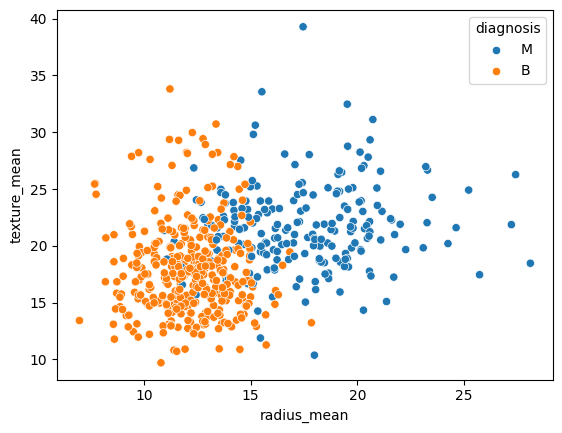

In [9]:
sns.scatterplot(x=df['radius_mean'],y=df['texture_mean'],hue=df['diagnosis'])

<Axes: xlabel='concave points_mean', ylabel='perimeter_mean'>

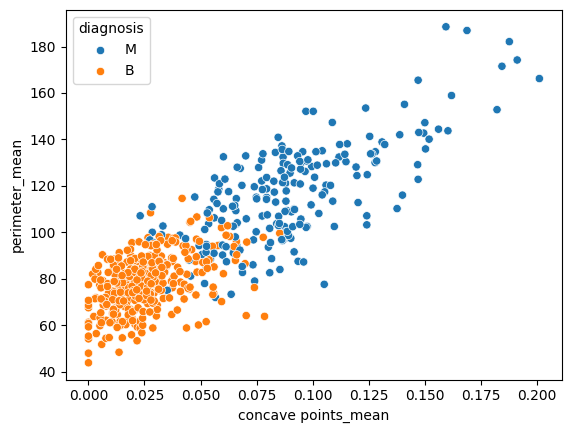

In [10]:
sns.scatterplot(x=df['concave points_mean'],y=df['perimeter_mean'],hue=df['diagnosis'])

<Axes: xlabel='area_worst', ylabel='concave points_worst'>

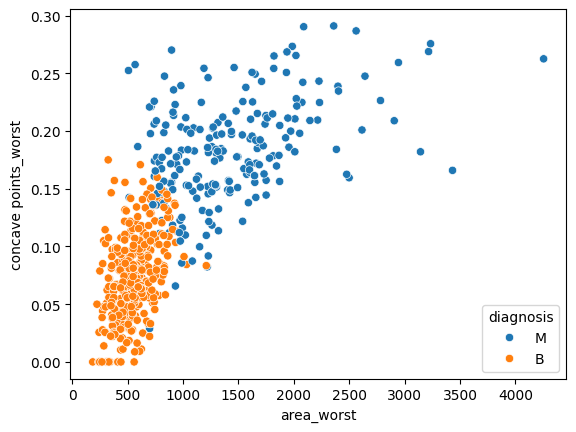

In [11]:
sns.scatterplot(x=df['area_worst'],y=df['concave points_worst'],hue=df['diagnosis'])

## Processing data

## Selecting features and the target

In [20]:
x = df.drop(columns = "diagnosis")     # feature

df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0}) # Encoding diagnosis (M=1,B=0) # .map() function didn't work so used .replace() instead
y = df['diagnosis']                  # target 

# Checking if M and B are replaced with 1 and 0 in y 
print(y.value_counts())


diagnosis
0    357
1    212
Name: count, dtype: int64


## Splitting & Normalizing the Data

In [21]:
# Splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=16) # Note that here the dataframe gets converted to a numpy array

# Scaling (Normalize)
scaler = StandardScaler()

# Now we scale like this to ensure x_train and x_test are pandas Dataframe and aren't converted to numpy array
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)


**Why normalization is CRITICAL for KNN ?**
- KNN relies on distance calculations
- Features with larger scales dominate distances
- StandardScaler makes all features comparable

## Training and Evaluating the baseline KNN Model

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
# Making predictions
y_pred = knn.predict(x_test)

In [30]:
print("Baseline Model Performance \n")
print(classification_report(y_test,y_pred))

Baseline Model Performance 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        91
           1       0.96      0.98      0.97        52

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Feature Ablation

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def feature_ablation(x_train, x_test, y_train, y_test, features):
    results = {}
    for feature in features:
        # # Drop one feature
        x_train_reduced = x_train.drop(columns=[feature])
        x_test_reduced = x_test.drop(columns=[feature])
        
        knn = KNeighborsClassifier(n_neighbors=5) # Train KNN
        knn.fit(x_train_reduced, y_train)
        y_pred = knn.predict(x_test_reduced)     # Predict

         # Store metrics
        results[feature] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred),
            'recall': recall_score(y_test, y_pred),
            'f1': f1_score(y_test, y_pred)
        }
    return results


**Explanation of function**

**1. Function definition:**
- X_train, X_test: the feature matrices for training and testing
- y_train, y_test: target labels for training and testing
- features: a list of column names (features) you want to test for ablation
- Purpose: Remove each feature one by one, retrain KNN, and record performance

**2. Create empty dictionary:** `results = {}` :This will store the performance metrics (accuracy, precision, recall, f1) for each feature after it is removed.

**3. Loop through features:** We will remove one feature at a time from the training and test sets and see the impact on KNN performance.

**4. Remove the feature:** `drop(columns=[feature])` removes the column from both training and testing sets.This gives a reduced dataset without the current feature.

**5. Train KNN and predict:**
- `KNeighborsClassifier(n_neighbors=5)`: initializes KNN with k=5 neighbors.
- `fit()` : trains KNN on the reduced training data.
- `predict()`: predicts labels for the reduced test data.

**6. Calculate and store metrics:** For the feature removed, compute:
- Accuracy: overall correctness
- Precision: correct positive predictions / total predicted positives
- Recall: correct positive predictions / total actual positives
- F1-score: harmonic mean of precision and recall

Store all metrics in the results dictionary with the feature name as key.

**7. Return the final dictionary:** After looping through all features, results contains the performance metrics for each feature removal.

## Implementation

In [29]:
# Define feature list
features = x.columns.tolist()  # gives all 30 numeric features
                              # Take all column names from X and store them as a normal Python list called features.

In [27]:
# Run feature ablation
results = feature_ablation(x_train,x_test,y_train,y_test,features)

## Analyze results

In [32]:
# Convert to DataFrame for easier visualization
results_df = pd.DataFrame(results).T  # transpose so features are rows
print(results_df.sort_values(by='accuracy', ascending=False))  # see which removal hurts accuracy the most
                                                              # They are sorted in descending order  

                         accuracy  precision    recall        f1
smoothness_worst         0.986014   1.000000  0.961538  0.980392
texture_mean             0.979021   0.980392  0.961538  0.970874
area_mean                0.979021   0.962264  0.980769  0.971429
symmetry_mean            0.979021   0.980392  0.961538  0.970874
compactness_se           0.979021   0.962264  0.980769  0.971429
perimeter_mean           0.979021   0.962264  0.980769  0.971429
concave points_se        0.979021   0.962264  0.980769  0.971429
fractal_dimension_worst  0.979021   0.962264  0.980769  0.971429
symmetry_worst           0.979021   0.962264  0.980769  0.971429
concave points_worst     0.979021   0.962264  0.980769  0.971429
fractal_dimension_se     0.979021   0.962264  0.980769  0.971429
compactness_mean         0.972028   0.961538  0.961538  0.961538
smoothness_mean          0.972028   0.980000  0.942308  0.960784
radius_mean              0.972028   0.944444  0.980769  0.962264
compactness_worst        

## Observation

The feature ablation study reveals that the KNN classifier maintains **high performance across most feature removals**, indicating that the Breast Cancer Wisconsin dataset contains **redundant and highly correlated features**. Even after removing individual features, the model consistently achieves accuracy above **96%**, demonstrating strong robustness.

### Key Observations
**1. Most Influential Feature**
- Removing smoothness_worst results in the highest performance drop, with: Accuracy = 98.60% , Recall = 96.15% , F1-score = 98.04%
- This indicates that worst-case smoothness plays a critical role in distinguishing malignant(M) from benign(B) tumors.

**2. Highly Important Feature Groups**
- Features related to **tumor size and shape**, such as: radius_mean, area_mean, perimeter_mean, radius_worst, area_worst, perimeter_worst
- Cause noticeable drops in **precision and F1-score** when removed, showing their strong contribution to model decisions.

**3. Moderately Important Features**
- Texture and symmetry-related features (texture_mean, symmetry_mean, concave points_mean) slightly reduce performance when removed but do not severely degrade results.
- This suggests these features support classification but are not solely decisive.

**4. Least Impactful Features**
- Removing features such as: symmetry_se, texture_worst, fractal_dimension_mean
- Leads to the **smallest performance degradation**, with F1-scores still above **95%**.
- These features contribute minimal unique information and may be partially redundant.

### Metric-Based Insight
- Recall remains consistently high, which is crucial in medical diagnosis, ensuring malignant cases are rarely missed.
- F1-score variations provide the clearest insight into feature importance, as they balance false positives and false negatives.
- Accuracy alone would have masked these subtle but important differences.

## Final Conclusion

The ablation study demonstrates that the KNN classifier relies most heavily on **worst-case tumor smoothness and size-related features**, while several texture and symmetry features are redundant. The model’s strong performance despite feature removal highlights the dataset’s inherent feature correlation and validates the importance of feature selection. This experiment confirms that **feature ablation is a powerful tool for interpretability**, especially in medical machine learning applications where understanding feature relevance is as important as predictive accuracy.